# Projeto 1: Report de mercado

### Desafio:

* Automação de um relatório de fechamento de mercado com o Python através da coleta de cotações históricas do Ibovespa e Dólar e do envio diário através de uma ferramenta de e-mail automaticamente.  

### Passo a passo:

*   **Passo 1** - Instalar e importar os módulos e bibliotecas.
   
   
*   **Passo 2** - Pegar as cotações históricas.
   
   
*   **Passo 3** - Tratar dados coletados.
   
   
*   **Passo 4** - Criar gráficos de performance.
   
   
*   **Passo 5** - Calcular retornos diários.
   
   
*   **Passo 6** - Configurar e enviar o e-mail.
   
-------------------

In [8]:
!pip install mplcyberpunk

In [10]:
!pip install yfinance

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

# Passo 2 - Pegar as cotações históricas


In [15]:
tickers = ["^BVSP", "^GSPC", "BRL=X"]

In [17]:
dados_mercado = yf.download(tickers, period = "6mo")
dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%%**********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-12,NaN,127668.0,NaN
2024-03-13,4.968700,128006.0,5165.310059
2024-03-14,4.969200,127690.0,5150.479980
2024-03-15,4.992700,126742.0,5117.089844
2024-03-18,4.968047,126954.0,5149.419922
...,...,...,...
2024-09-09,5.596600,134737.0,5471.049805
2024-09-10,5.584300,134320.0,5495.520020
2024-09-11,5.662900,134677.0,5554.129883


# Passo 3 - Tratar dados coletados.


In [20]:
dados_mercado = dados_mercado.dropna()

dados_mercado

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-13,4.968700,128006.0,5165.310059
2024-03-14,4.969200,127690.0,5150.479980
2024-03-15,4.992700,126742.0,5117.089844
2024-03-18,4.968047,126954.0,5149.419922
2024-03-19,5.029400,127529.0,5178.509766
...,...,...,...
2024-09-06,5.567500,134572.0,5408.419922
2024-09-09,5.596600,134737.0,5471.049805
2024-09-10,5.584300,134320.0,5495.520020


In [22]:
dados_mercado.columns = ["DOLAR", "IBOVESPA", "S&P500"]

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-13,4.968700,128006.0,5165.310059
2024-03-14,4.969200,127690.0,5150.479980
2024-03-15,4.992700,126742.0,5117.089844
2024-03-18,4.968047,126954.0,5149.419922
2024-03-19,5.029400,127529.0,5178.509766
...,...,...,...
2024-09-06,5.567500,134572.0,5408.419922
2024-09-09,5.596600,134737.0,5471.049805
2024-09-10,5.584300,134320.0,5495.520020


# Passo 4 - Criar gráficos de performance.

In [25]:
plt.style.use("cyberpunk")

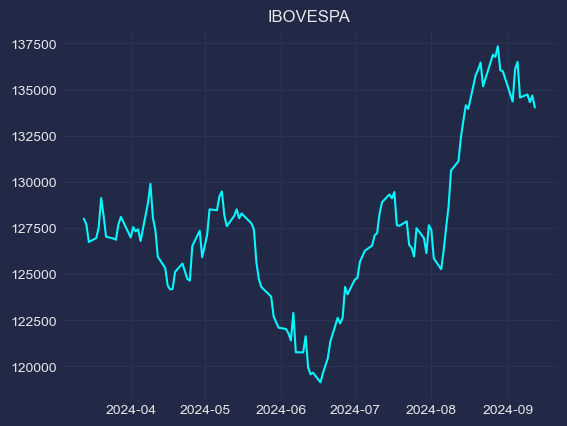

In [27]:
plt.plot(dados_mercado["IBOVESPA"])
plt.title("IBOVESPA")

plt.savefig("ibovespa.png")

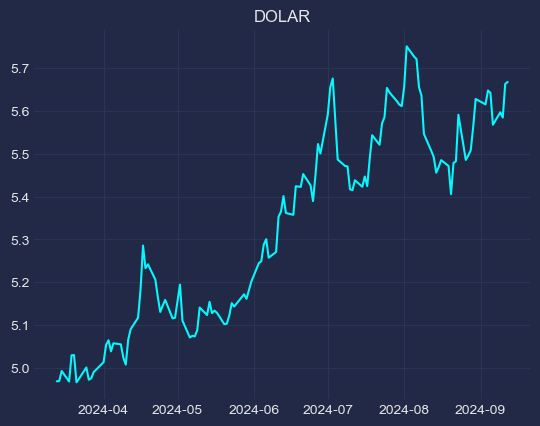

In [29]:
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR")

plt.savefig("dolar.png")

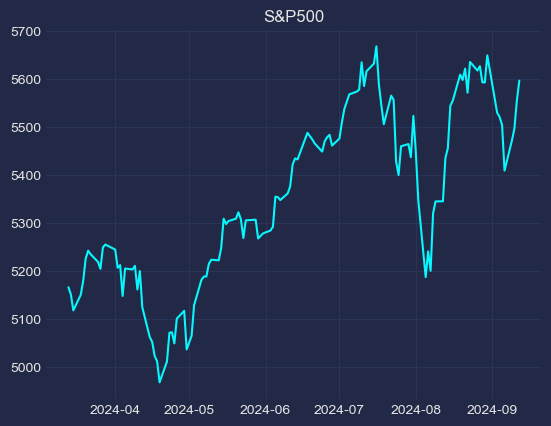

In [31]:
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500")

plt.savefig("sp500.png")

# Passo 5 - Calcular retornos diários.


In [34]:
retornos_diarios = dados_mercado.pct_change()

retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-13,NaN,NaN,NaN
2024-03-14,0.000101,-0.002469,-0.002871
2024-03-15,0.004729,-0.007424,-0.006483
2024-03-18,-0.004938,0.001673,0.006318
2024-03-19,0.012349,0.004529,0.005649
...,...,...,...
2024-09-06,-0.013205,-0.014139,-0.017260
2024-09-09,0.005227,0.001226,0.011580
2024-09-10,-0.002198,-0.003095,0.004473


In [36]:
retornos_diarios["DOLAR"].iloc[-3]

-0.0021977654957378023

In [38]:
retorno_dolar = retornos_diarios["DOLAR"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOVESPA"].iloc[-1]
retorno_sp = retornos_diarios["S&P500"].iloc[-1]

In [40]:
retorno_dolar = str(round(retorno_dolar * 100, 2)) + "%"

retorno_dolar

'0.08%'

In [42]:
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + "%"
retorno_sp = str(round(retorno_sp * 100, 2)) + "%"

retorno_sp

'0.75%'

In [44]:
retorno_ibovespa

'-0.48%'

# Passo 6 - Configurar e enviar o e-mail


In [47]:
!pip install pywin32

In [56]:
import win32com.client as win32

In [ ]:
#smtplib

In [58]:
# outlook = win32.Dispatch("outlook.application") 

# email = outlook.CreateItem(0)

In [60]:
# email.To = "evento@varos.com.br"
# email.Subject = "Relatório de Mercado"
# email.Body = f'''Prezado diretor, segue o relatório de mercado:

# * O Ibovespa teve o retorno de {retorno_ibovespa}.
# * O Dólar teve o retorno de {retorno_dolar}.
# * O S&P500 teve o retorno de {retorno_sp}.

# Segue em anexo a peformance dos ativos nos últimos 6 meses.

# Att,
# Melhor estagiário do mundo


# '''

# anexo_ibovespa = r"C:\Users\VAROS\Downloads\ibovespa.png"
# anexo_dolar = r"C:\Users\VAROS\Downloads\dolar.png"
# anexo_sp = r"C:\Users\VAROS\Downloads\sp500.png"

# email.Attachments.Add(anexo_ibovespa)
# email.Attachments.Add(anexo_dolar)
# email.Attachments.Add(anexo_sp)

# email.Send()
